<center><font size="16">**Titanic: Machine Learning from Disaster**</font></center>

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this notebook, we will see how to dig deep into the data and visualize it.

 [![TITANIC sinking](https://i.imgur.com/8Rmg0vy.jpg)](https://youtu.be/9xoqXVjBEF8 "TITANIC sinking")

### Data

The data has been split into two groups:

- titanic data (titanic_data.csv)
- competition data (competition.csv)

The tasks given to you will be performed on "competition.csv"

### Data Dictionary

<center>
<table class="table table-bordered">
<tr>
<th style="width:5%">Variable</th><th style="width:5%">Definition</th><th style="width:5%">Key</th>
</tr>
<tr>
<td>survival</td>
<td>Survival</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>pclass</td>
<td>Ticket class</td>
<td>1 = 1st, 2 = 2nd, 3 = 3rd</td>
</tr>
<tr>
<td>sex</td>
<td>sex</td>
<td></td>
</tr>
<tr>
<td>Age</td>
<td>Age in years</td>
<td></td>
</tr>
<tr>
<td>sibsp</td>
<td># of siblings / spouses aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>parch</td>
<td># of parents / children aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>ticket</td>
<td>Ticket number</td>
<td></td>
</tr>
<tr>
<td>fare</td>
<td>Passenger fare</td>
<td></td>
</tr>
<tr>
<td>cabin</td>
<td>Cabin number</td>
<td></td>
</tr>
<tr>
<td>embarked</td>
<td>Port of Embarkation</td>
<td>C = Cherbourg, Q = Queenstown, S = Southampton</td>
</tr>
</table>
</center>

# Wrangling & EDA

## 1. Loading Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

## 2. Loading Data & Basic Analysis

In [2]:
data = pd.read_csv('titanic_data.csv')
dftitanic = data.copy()

### Task 1
Import the competition file and copy it

In [59]:
#Write the code here
data_comp = data = pd.read_csv('competition.csv')
dfcomp = data_comp.copy()

### Basic Structure

In [60]:
dftitanic.shape

(891, 12)

**Task 2:**
Find the shape of 'dfcomp'

In [61]:
#Write code here
dfcomp.shape

(418, 11)

In [62]:
dftitanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Task 3:**
Head for 'dfcomp'

In [63]:
#Write code here
dfcomp.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [64]:
dftitanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

**Task 4:**
Find datatypes for dfcomp

In [65]:
#Write code here
dfcomp.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [66]:
dftitanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [67]:
dftitanic.describe(include=["O"])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [68]:
dftitanic.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


**Task 5:** 
Describe statistics for 'dfcomp'

In [69]:
#Write code here
dfcomp.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [70]:
dfcomp.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Kelly, Mr. James",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [71]:
dfcomp.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


### Completeness

In [72]:
dftitanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Task 6:**
Check completeness for 'dfcomp'

In [73]:
#Write code here
dfcomp.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## 3. Exploration

### 3.1 Exploration of Complete & Important Variables

Our response variable in the training set is complete, as well as Sex and Pclass, which seem two of the most important predictors.

**Survival**

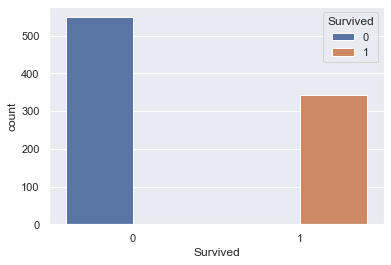

In [74]:
sns.countplot(x='Survived', hue='Survived', data=dftitanic);

**Gender & Survival**

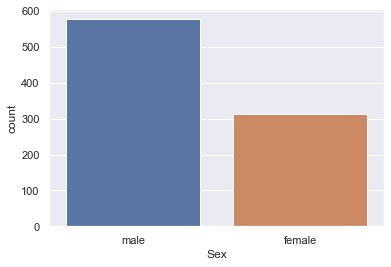

In [75]:
sns.countplot(x='Sex', data=dftitanic);

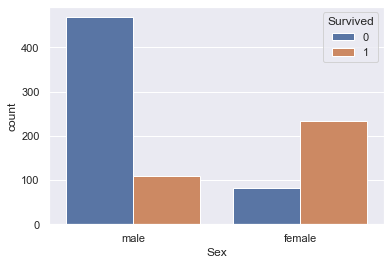

In [76]:
sns.countplot(x='Sex', hue='Survived', data=dftitanic);

**Task 7:**
Make a count plot for gender using 'dfcomp'

<AxesSubplot:xlabel='Sex', ylabel='count'>

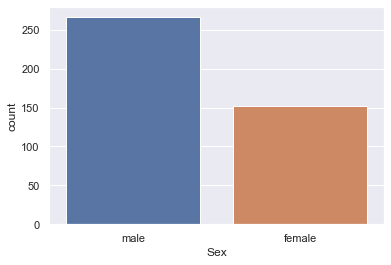

In [77]:
#Write code here
sns.countplot(x='Sex', data=dfcomp)

### Passenger Survival Class

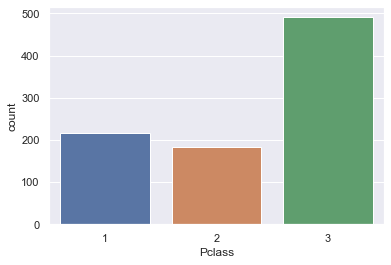

In [78]:
sns.countplot(x='Pclass', data=dftitanic);

**Task 8:**
Make a count plot for 'pclass' using 'dfcomp'

In [79]:
#Write code here


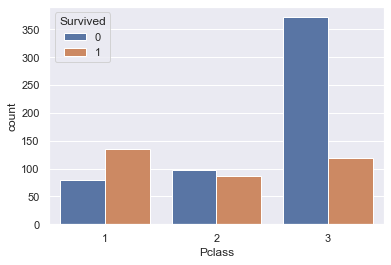

In [80]:
sns.countplot(x='Pclass', hue='Survived', data=dftitanic);

**Passenger Class, Gender & Survival**

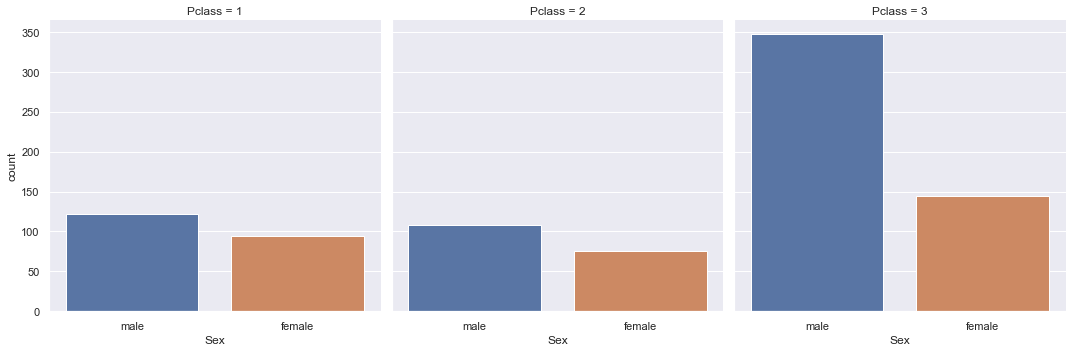

In [81]:
sns.catplot(x='Sex', col='Pclass', data=dftitanic, kind='count');

C:\Users\GM Enterprises\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


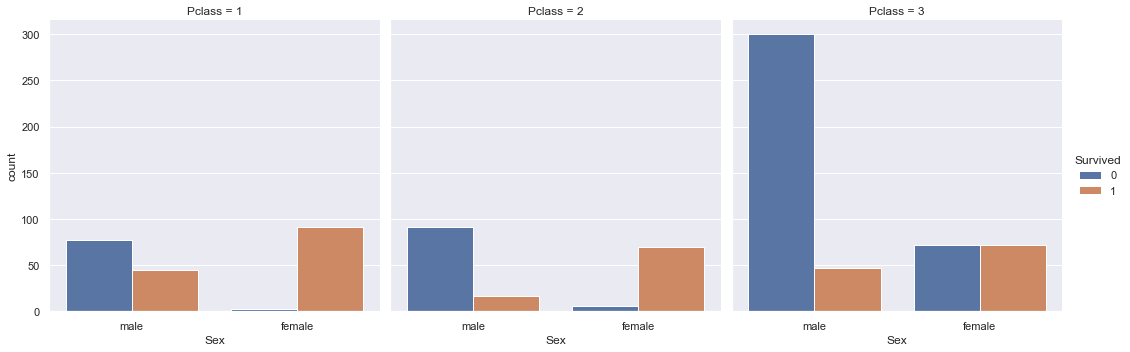

In [27]:
sns.factorplot(x='Sex', col='Pclass', hue='Survived', data=dftitanic, kind='count');

**Task 9:** 
Make factor plot using dfcomp for gender, pclass and their count

In [28]:
# Write code here


### 3.2 What's in the name?

In [29]:
dftitanic['Name'].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

**Extracting & Analyzing Titles**

This is called feature engineering where you derive additional columns as per your domain knowledge like creating 'Title in the following example.

In [30]:
import re 
a='Braund, Mr.Owen Harris'
re.search(' ([A-Z][a-z]+)\.', a).group(1)

'Mr'

In [31]:
dftitanic['Title'] = dftitanic['Name'].apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))
dftitanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [32]:
dftitanic['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

**Taks 10:**
Find the titles for dfcomp

In [33]:
# Write code here


**Task 11:**
Display the count for title in dfcomp

In [34]:
# Write the code here


The term *Mademoiselle* is a French familiar title, abbreviated **Mlle**, traditionally given to an unmarried woman. The equivalent in English is "Miss". However, the courtesy title "Madame" is accorded women where their marital status is unknown.

In [35]:
dftitanic['Title'] = dftitanic['Title'].replace('Mlle', 'Miss')

In France, one traditionally calls a young, unmarried woman Mademoiselle – Mlle for short – and an older, married woman _Madame_, whose abbreviation is **Mme**.

In [36]:
dftitanic['Title'] = dftitanic['Title'].replace('Mme', 'Mrs')

In [37]:
dftitanic.loc[(~dftitanic['Title'].isin(['Mr', 'Mrs', 'Miss', 'Master'])), 'Title'] = 'Rare Title'

In [38]:
dftitanic['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare Title'], dtype=object)

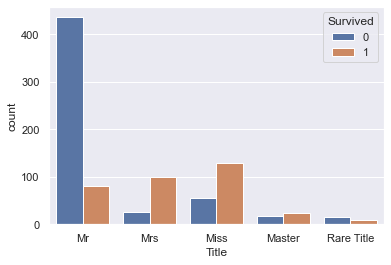

In [39]:
sns.countplot(data=dftitanic,x='Title', hue='Survived');

**Task 12:**
Assigning the remaining titles as 'Rare Title' in dfcomp

In [40]:
#Write the code here


### 3.3 Travelling Alone vs. Travelling in groups

**3.3.1 Family Size**

In [41]:
dftitanic['Fsize'] = dftitanic['SibSp'] + dftitanic['Parch']+1

**Task 13:**
Show the countplot on column **'Fsize'** and check how many people are survived and died.

In [42]:
# Write the code here


In [43]:
dftitanic.groupby('Fsize')['Survived'].value_counts(normalize=True).reset_index(name='perc')

,Fsize,Survived,perc
0,1,0,0.696462
1,1,1,0.303538
2,2,1,0.552795
3,2,0,0.447205
4,3,1,0.578431
5,3,0,0.421569
6,4,1,0.724138
7,4,0,0.275862
8,5,0,0.800000
9,5,1,0.200000


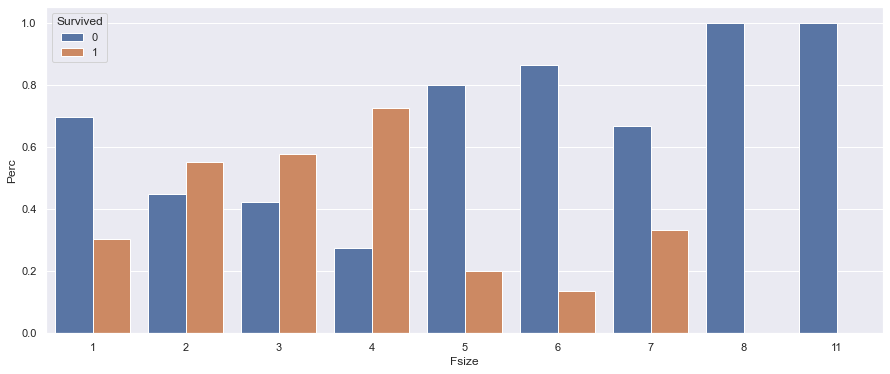

In [44]:
temp = dftitanic.groupby('Fsize')['Survived'].value_counts(normalize=True).reset_index(name='Perc')

plt.figure(figsize=(15,6));
sns.barplot(data=temp,x='Fsize', y='Perc', hue='Survived', dodge=True);

**3.3.2 How many people booked together?**

_Apart from families, there could be groups of friends travelling together._

In [45]:
dftitanic['Ticket'].value_counts().head()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
Name: Ticket, dtype: int64

**reset_index()** is a method to reset index of a Data Frame. **reset_index()** method sets a list of integer ranging from 0 to length of data as index.

In [46]:
dftitanic['Ticket'].value_counts().reset_index().head()

,index,Ticket
0,347082,7
1,CA. 2343,7
2,1601,7
3,3101295,6
4,CA 2144,6


In [47]:
temp = dftitanic['Ticket'].value_counts().reset_index(name='Tsize')

In [48]:
dftitanic = dftitanic.merge(temp, left_on='Ticket', right_on='index',how='inner').drop('index', axis=1)
dftitanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize,Tsize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,2
4,138,0,1,"Futrelle, Mr. Jacques Heath",male,37.0,1,0,113803,53.1000,C123,S,Mr,2,2


**Task 14:**
Show the countplot on column **'Tsize'** and check how many people are survived and died.

In [49]:
#write code here



In [50]:
temp = dftitanic.groupby('Tsize')['Survived'].value_counts(normalize=True).reset_index(name='Perc')

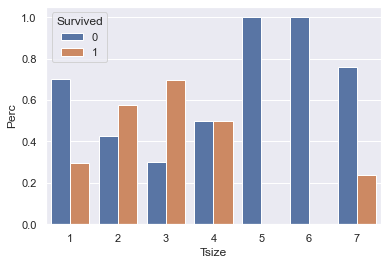

In [51]:
sns.barplot(x='Tsize', y='Perc', hue='Survived', data=temp, dodge=True);

**3.3.3 Consolidating family & friends**

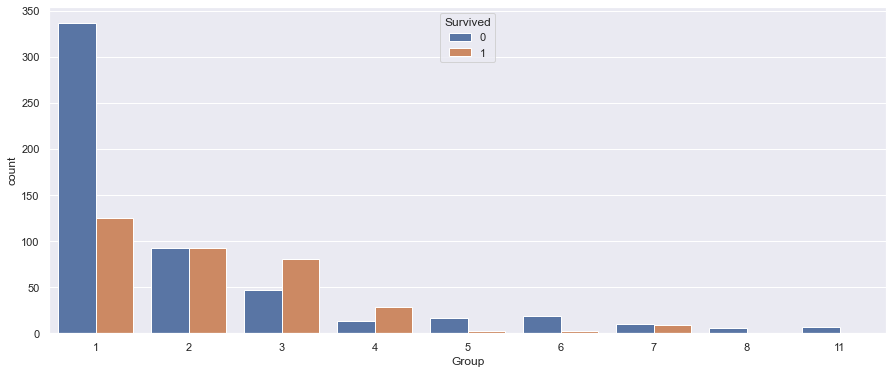

In [52]:
dftitanic['Group'] = dftitanic[['Tsize', 'Fsize']].max(axis=1)

plt.figure(figsize=(15,6));
sns.countplot(x='Group', hue='Survived', data=dftitanic);

In [53]:
dftitanic['GrpSize'] = ''
dftitanic.loc[dftitanic['Group']==1, 'GrpSize'] = dftitanic.loc[dftitanic['Group']==1, 'GrpSize'].replace('', 'solo')
dftitanic.loc[dftitanic['Group']==2, 'GrpSize'] = dftitanic.loc[dftitanic['Group']==2, 'GrpSize'].replace('', 'couple')
dftitanic.loc[(dftitanic['Group']<=4) & (dftitanic['Group']>=3), 'GrpSize'] = dftitanic.loc[(dftitanic['Group']<=4) & (dftitanic['Group']>=3), 'GrpSize'].replace('', 'group')
dftitanic.loc[dftitanic['Group']>4, 'GrpSize'] = dftitanic.loc[dftitanic['Group']>4, 'GrpSize'].replace('', 'large group')
dftitanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize,Tsize,Group,GrpSize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2,1,2,couple
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1,2,couple
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,1,1,solo
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,2,2,couple
4,138,0,1,"Futrelle, Mr. Jacques Heath",male,37.0,1,0,113803,53.1000,C123,S,Mr,2,2,2,couple


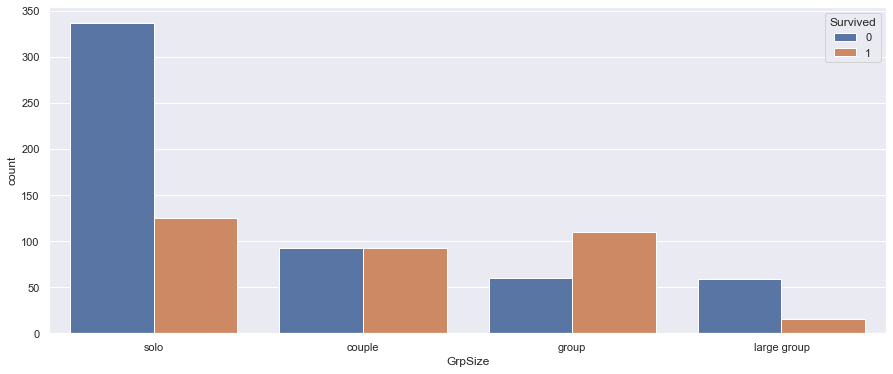

In [54]:
plt.figure(figsize=(15,6));
sns.countplot(x='GrpSize', order=['solo', 'couple', 'group', 'large group'], hue='Survived', data=dftitanic);

**Task 15:**
Applying same transformation on **'dfcomp'**

- FSize task
- Tsize task
- Group Column

In [55]:
#Fsize

#Ticket Size

# Grouping



Applying the same categories for groups on 'dfcomp'

In [56]:
dfcomp['GrpSize'] = ''
dfcomp.loc[dfcomp['Group']==1, 'GrpSize'] = dfcomp.loc[dfcomp['Group']==1, 'GrpSize'].replace('', 'solo')
dfcomp.loc[dfcomp['Group']==2, 'GrpSize'] = dfcomp.loc[dfcomp['Group']==2, 'GrpSize'].replace('', 'couple')
dfcomp.loc[(dfcomp['Group']<=4) & (dfcomp['Group']>=3), 'GrpSize'] = dfcomp.loc[(dfcomp['Group']<=4) & (dfcomp['Group']>=3), 'GrpSize'].replace('', 'group')
dfcomp.loc[dfcomp['Group']>4, 'GrpSize'] = dfcomp.loc[dfcomp['Group']>4, 'GrpSize'].replace('', 'large group')
dfcomp.head()

KeyError: 'Group'

### 3.4 Effect of Fare

**Task 16:**
Check the null values of fare

In [ ]:
# Write code here


In [ ]:
plt.subplots(figsize=(15,6))
sns.distplot(dftitanic['Fare']);

In [ ]:
dftitanic[dftitanic['Fare'] < 0]

In [ ]:
dftitanic[dftitanic['Fare'] == 0]

In [ ]:
dftitanic.loc[(dftitanic['Fare'] == 0) & (dftitanic['Pclass'] == 1), 'Fare'] = dftitanic[dftitanic['Pclass'] == 1]['Fare'].median()
dftitanic.loc[(dftitanic['Fare'] == 0) & (dftitanic['Pclass'] == 2), 'Fare'] = dftitanic[dftitanic['Pclass'] == 2]['Fare'].median()
dftitanic.loc[(dftitanic['Fare'] == 0) & (dftitanic['Pclass'] == 3), 'Fare'] = dftitanic[dftitanic['Pclass'] == 3]['Fare'].median()

In [ ]:
dftitanic[dftitanic['Fare']==0]

Assigning categories to fare

In [ ]:
dftitanic['FareCat'] = ''
dftitanic.loc[dftitanic['Fare']<=10, 'FareCat'] = '0-10'
dftitanic.loc[(dftitanic['Fare']>10) & (dftitanic['Fare']<=25), 'FareCat'] = '10-25'
dftitanic.loc[(dftitanic['Fare']>25) & (dftitanic['Fare']<=40), 'FareCat'] = '25-40'
dftitanic.loc[(dftitanic['Fare']>40) & (dftitanic['Fare']<=70), 'FareCat'] = '40-70'
dftitanic.loc[(dftitanic['Fare']>70) & (dftitanic['Fare']<=100), 'FareCat'] = '70-100'
dftitanic.loc[dftitanic['Fare']>100, 'FareCat'] = '100+'
dftitanic[['Fare', 'FareCat']].head()

In [ ]:
plt.subplots(figsize=(15,6))
sns.countplot(x='FareCat', order=['0-10', '10-25', '25-40', '40-70', '70-100', '100+'], hue='Survived', data=dftitanic);

**Task 17:** 
Applying same changes on **'dfcomp'**

- First check if Fair is zero
- Then replace it with median fare of Pclass

In [ ]:
#Write code to check the Fair


In [ ]:
#write the code to find the median



**Task 18:** 
Make categories of fare as following:

- If Fare is <=10, then category= '0-10' 
- If Fare is >10 and Fare is <=25, then category= '10-25'
- If Fare is >25 and Fare is <=40, then category= '25-40'
- If Fare is >40 and Fare is <=70, then category= '40-70'
- If Fare is >70 and Fare is <=100, then category= '70-100'
- If Fare is >100, then category= '100+'

In [ ]:
#Write the code for Assigning Categories
dfcomp['FareCat'] = ''




dfcomp[['Fare', 'FareCat']].head()

### 3.5 Effect of Embarked variable

_C = Cherbourg(France), Q = Queenstown(Ireland), S = Southampton(England)_

**Task 19:** 
Make the countplot for embarkments   

In [ ]:
# Write the code here



***Engineered Features***

In [ ]:
dftitanic.head(2)

**Task 20:**
Check the engineered features for dfcomp

In [ ]:
#Write the code here



## 4. Missing Values

### 4.1 Age

In [ ]:
sns.kdeplot(dftitanic[dftitanic['Survived'] == 0]['Age'].dropna(), shade=True,label="Not survived");
sns.kdeplot(dftitanic[dftitanic['Survived'] == 1]['Age'].dropna(), shade=True,label="Survived");

In [ ]:
temp = dftitanic[dftitanic['Age'].isnull() == False]

In [ ]:
sns.set_context('poster')
sns.factorplot(kind='box', x='Age', col='Title', row='Pclass', data=temp);

In [ ]:
for t in dftitanic['Title'].unique():
    for p in dftitanic['Pclass'].unique():
        dftitanic.loc[(dftitanic['Title'] == t) & (dftitanic['Pclass'] == p) & (dftitanic['Age'].isnull()), 'Age'] = dftitanic.loc[(dftitanic['Title'] == t) & (dftitanic['Pclass'] == p), 'Age'].median()

In [ ]:
plt.subplots(figsize=(10,6))
sns.kdeplot(dftitanic[dftitanic['Survived'] == 0]['Age'], shade=True,label='Not Survived');
sns.kdeplot(dftitanic[dftitanic['Survived'] == 1]['Age'], shade=True,label='Survived');

**Task 21:**
Check if there is any null in the column 'Age'

In [ ]:
#Write code here



Creating Age categories

In [ ]:
dftitanic['AgeCat']=''
dftitanic.loc[ dftitanic['Age'] <= 16, 'AgeCat'] = '0-16'
dftitanic.loc[(dftitanic['Age'] > 16) & (dftitanic['Age'] <= 32), 'AgeCat'] = '16-32'
dftitanic.loc[(dftitanic['Age'] > 32) & (dftitanic['Age'] <= 48), 'AgeCat'] = '32-48'
dftitanic.loc[(dftitanic['Age'] > 48) & (dftitanic['Age'] <= 64), 'AgeCat'] = '48-64'
dftitanic.loc[ dftitanic['Age'] > 64, 'AgeCat']= '64+'

**Task 22:**
Replace missing Age & Fair values in **'dfcomp'**

In [ ]:
#Write the code for filling in the values with median




Checking the null values in 'Age' column again!

In [ ]:
dfcomp['Age'].isnull().sum()

Checking the **pclass** and **title** for which the null value exists

In [ ]:
dfcomp.loc[(dfcomp['Age'].isnull()),'Pclass':'Title'] 

Filling in the missing value with the median of the specific **pclass**

In [ ]:
dfcomp.loc[(dfcomp['Age'].isnull()) & (dfcomp['Pclass'] == 3) & (dfcomp['Title'] == 'Rare Title'), 'Age'] = dfcomp.loc[(dfcomp['Title'] == 'Rare Title') & (dfcomp['Pclass'] == 3), 'Age'].median()

**Task 23:**
Repeat the above procedure for **'Fare'**

In [ ]:
#Write the code to check if there is any null value 



In [ ]:
#Write code to check the pclass and title for which the null value exists



In [ ]:
#Write code to fill in the missing value



In [ ]:
#Assigning the category to the newly added value
dfcomp.loc[dfcomp['Fare']<=10, 'FareCat'] = '0-10'

**Task 24:** Make Categories for Age as following
- If Age is <=16, then category= '0-16' 
- If Age is >16 and Fare is <=32, then category= '16-32'
- If Age is >32 and Fare is <=48, then category= '32-48'
- If Age is >48 and Fare is <=64, then category= '48-64'
- If Agee is >64, then category= '64+'

In [ ]:
#Write the code here 



### 4.2 Embarkment and null values

In [ ]:
dftitanic.describe(include='O')

In [ ]:
dftitanic['Embarked'].isnull().sum()

In [ ]:
dftitanic.loc[(dftitanic['Embarked'].isnull()),'Embarked']='S'

**Task 25:** Check the nulls in 'Embarked' for **'dfcomp'** and see if any value needs to be replaced

In [ ]:
# Write code to check the nulls in Embarked


In [ ]:
#Write the code here to replace


### 4.3 Dropping Cabin

Defining the cabin type

In [ ]:
dftitanic['CabinType'] = dftitanic['Cabin'].str[0]

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x='CabinType', hue='Survived', data=dftitanic);

Dropping Cabin

In [ ]:
dftitanic.groupby(['CabinType', 'Pclass'])['Pclass'].count()

In [ ]:
dftitanic.drop('Cabin',axis=1,inplace=True)

**Task 26:** 
Drop cabin from dfcomp

In [ ]:
#Write the code here


**Task 27:** Check missing values in dftitanic

In [ ]:
#Write the code here


**Task 28:** Checking missing values in **'dfcomp'**

In [ ]:
#wrtie the code here


## 5. Feature Selection

In [ ]:
sns.set_context('poster')

In [ ]:
sns.set_context('poster')
plt.figure(figsize=(15,6))
cor = dftitanic.drop('PassengerId',axis=1).corr()
sns.heatmap(cor, annot=True, fmt='.1g');

The above heat map shows the corelation of different columns with eachother. A heatmap often helps to view the corelation as seen above. Looking at the above heatmap we can conclude that which attributes or columns are corelated and and can be removed to get a better shaped dataset.

The following points are to be considered for dropping the columns

- **'Group'** holds a corelation of 0.9 with **'Fsize'** and **'Tsize'**. So we will remove **'Group'** and **'Tsize'** because related data can be found in **'GrpSize'**.
- **'Fsize'** still has a corelation of 0.9  with **'SibSp'** and 0.8 with **'Parch'**.So we will remove 'Fsize' because **'SibSp'** and **'Parch'** are providing the required information.
- The **'Name'** column can also be removed because **'Title'** has been extracted.
- Similarly **'Age'** and **'Fare'** can also be removed because **'AgeCat'** and **'FareCat'** provide the related information.

So the final columns to be dropped are: 'Name','Age','Fare','Ticket','Fsize','Tsize' and 'Group'


In [ ]:
drop_features = ['Name','Age','Fare','Ticket','Fsize','Tsize','Group']

Selecting final features

In [ ]:
dftitanic.drop(drop_features,axis=1,inplace=True)

**Task 29:** Draw the heatmap as shown above and find the co-relation. Also check which features are to be removed.

In [ ]:
#Write the code for heat map here



**Task 30:** Drop the features in dfcomp using **drop_features**

In [ ]:
#Write the code to drop the columns here


Exporting final dataset in csv file

In [ ]:
dftitanic.to_csv('titanic_clean.csv',index=False)

**Task 31:** Export **'dfcomp'** into csv file

In [ ]:
#Write code here
